<a href="https://colab.research.google.com/github/KabirSuri/Adult-Income-Analysis/blob/main/Adult_Income_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Examining Data

This data set was taken from UCI Machine Learning. It displays the information of adults taken an extraction of the 1994 Census database.

In [ ]:
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df=pd.read_csv(url, header=None)
df.columns=[
            'age','workclass','fnlwgt','education','education-num',
            'marital-status','occupation','relationship','race',
            'sex','capital-gain','capital-loss','hours-per-week','native-country', 'annual-income'
            ]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


There are multiple columns of interest, including 'occupation', 'education'/'education-num', 'annual-income', etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual-income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are no null values, but some values are '?'. These and the values that are objects must be dealt with for proper analysis on the data.


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


As expected, there is immense variation in 'age', 'education-num', 'hours-per-week', etc.

#Histograms

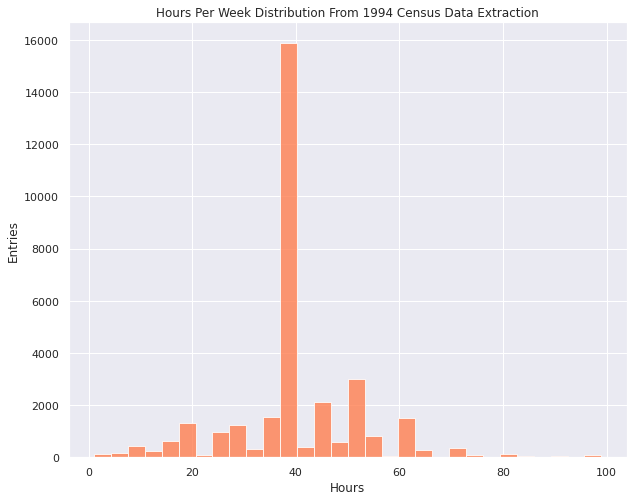

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,8))
plt.hist(df['hours-per-week'], bins=30, log=False, color='coral', alpha=0.8)
title='Hours Per Week Distribution From 1994 Census Data Extraction'
plt.xlabel('Hours')
plt.ylabel('Entries')
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

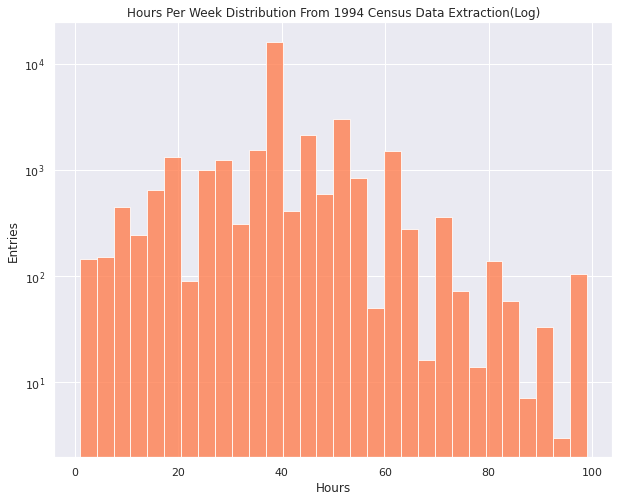

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,8))
plt.hist(df['hours-per-week'], bins=30, log=True, color='coral', alpha=0.8)
title='Hours Per Week Distribution From 1994 Census Data Extraction(Log)'
plt.xlabel('Hours')
plt.ylabel('Entries')
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

The distribution of grades is skewed right with a median 40 hours per week.

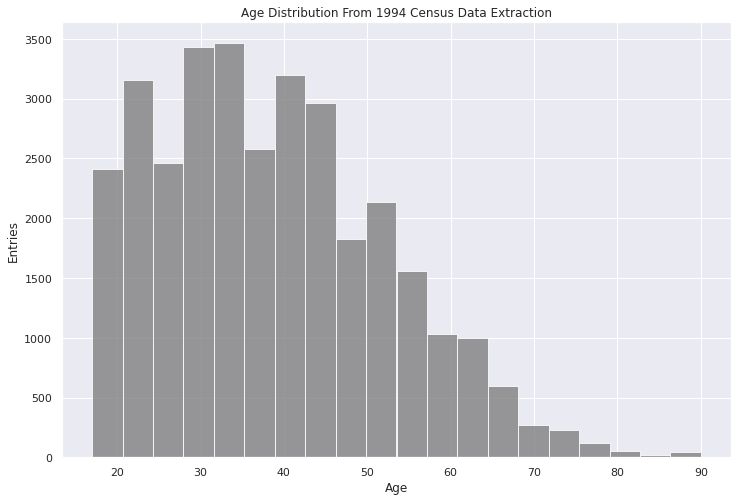

In [ ]:
import seaborn as sns
sns.set()

plt.figure(figsize=(12,8))
plt.hist(df['age'], bins=20, color='grey', alpha=0.8)
title='Age Distribution From 1994 Census Data Extraction'
plt.xlabel('Age')
plt.ylabel('Entries')
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

The distribution of age is skewed right with a median of 37 years.

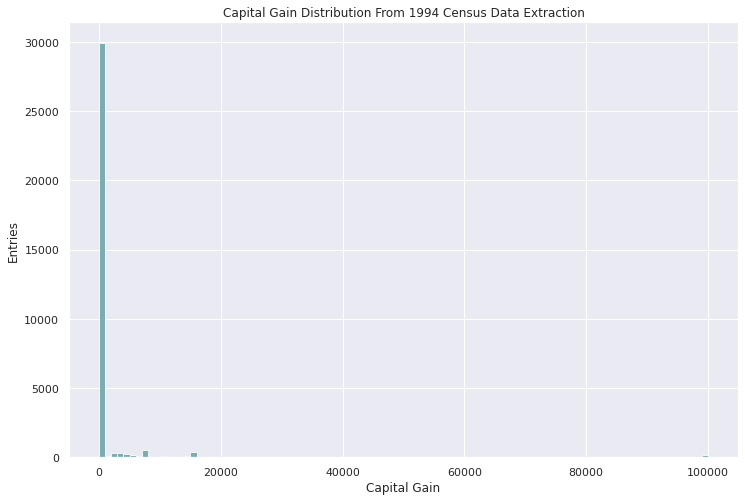

In [ ]:
import seaborn as sns
sns.set()

plt.figure(figsize=(12,8))
plt.hist(df['capital-gain'], bins=100, color='cadetblue', alpha=0.8)
title='Capital Gain Distribution From 1994 Census Data Extraction'
plt.xlabel('Capital Gain')
plt.ylabel('Entries')
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

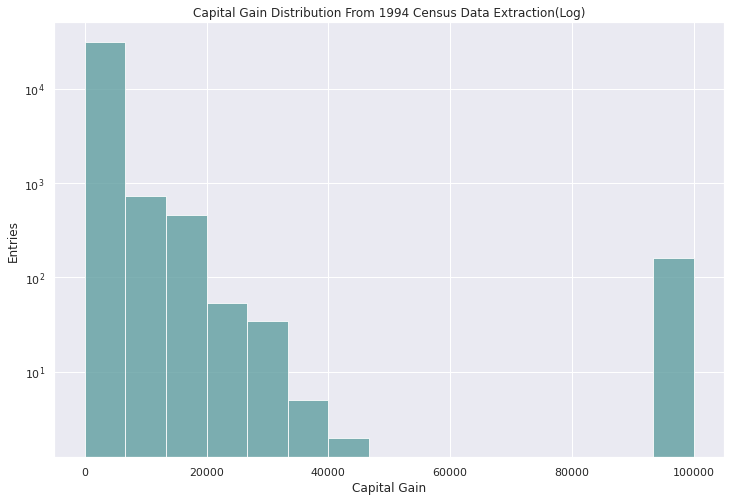

In [ ]:
import seaborn as sns
sns.set()

plt.figure(figsize=(12,8))
plt.hist(df['capital-gain'], bins=15, color='cadetblue', alpha=0.8, log=True)
title='Capital Gain Distribution From 1994 Census Data Extraction(Log)'
plt.xlabel('Capital Gain')
plt.ylabel('Entries')
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

The distribution of captial gain is heavily skewed right with a median of 0 capital gain.

#Removing Null Values

In [ ]:
columns=['age','workclass','fnlwgt','education','education-num',
            'marital-status','occupation','relationship','race',
            'sex','capital-gain','capital-loss','hours-per-week','native-country', 'annual-income']
for index in range(len(df)):
    for column in columns:
        if(df[column][index]==' ?'):
            df=df.drop(index)
            index-=1
            break

Since the nulls in this data frame are represented as '?', instead of removing rows with null values, we remove rows with '?' in any of its columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  annual-income   30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


The difference in entries in this line of code vs the earlier line of code shows us that the '?' elements have been removed

#Scatter Plots

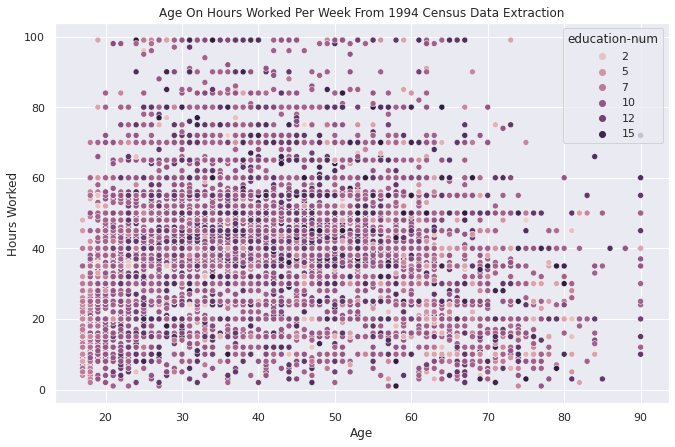

In [ ]:
sns.set()

plt.figure(figsize=(11,7))
sns.scatterplot(x=df['age'], y=df['hours-per-week'], hue=df['education-num'])
plt.xlabel('Age')
plt.ylabel('Hours Worked')
title='Age On Hours Worked Per Week From 1994 Census Data Extraction'
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

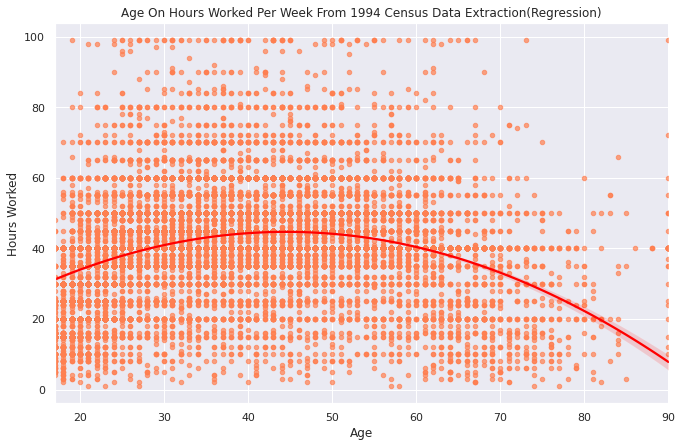

In [ ]:
sns.set()

plt.figure(figsize=(11,7))
sns.regplot(x=df['age'], y=df['hours-per-week'], color='coral',
            scatter_kws = {'alpha':0.70, 's':20},
            line_kws = {'color': 'red'},
            order=2)
plt.xlabel('Age')
plt.ylabel('Hours Worked')
title='Age On Hours Worked Per Week From 1994 Census Data Extraction(Regression)'
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

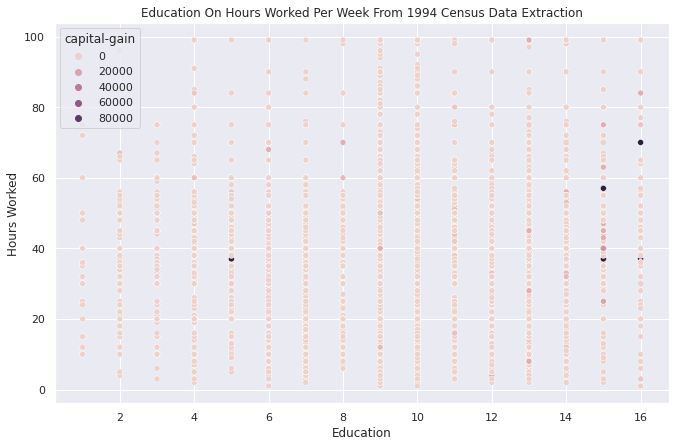

In [ ]:
sns.set()

plt.figure(figsize=(11,7))
sns.scatterplot(x=df['education-num'], y=df['hours-per-week'], hue=df['capital-gain'])
plt.xlabel('Education')
plt.ylabel('Hours Worked')
title='Education On Hours Worked Per Week From 1994 Census Data Extraction'
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

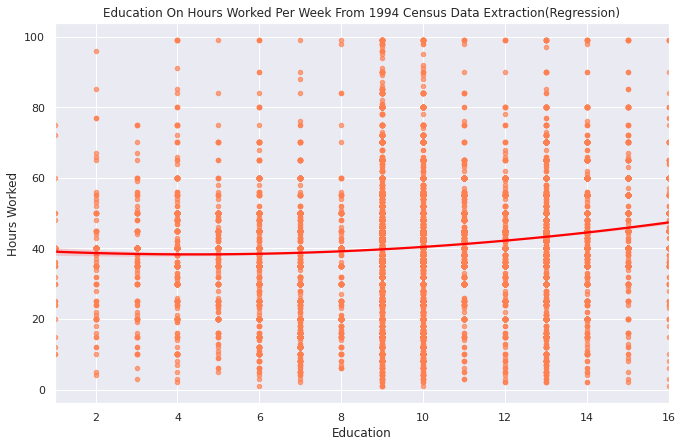

In [ ]:
sns.set()

plt.figure(figsize=(11,7))
sns.regplot(x=df['education-num'], y=df['hours-per-week'], color='coral',
            scatter_kws = {'alpha':0.70, 's':20},
            line_kws = {'color': 'red'},
            order=2)
plt.xlabel('Education')
plt.ylabel('Hours Worked')
title='Education On Hours Worked Per Week From 1994 Census Data Extraction(Regression)'
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

#Bar Plots

In [ ]:
copy_df=df.groupby('occupation').agg('median')
copy_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,,
Adm-clerical,35.0,179985.0,10.0,0.0,0.0,40.0
Armed-Forces,29.0,191073.0,9.0,0.0,0.0,40.0
Craft-repair,38.0,180265.5,9.0,0.0,0.0,40.0
Exec-managerial,41.0,174215.0,12.0,0.0,0.0,40.0
Farming-fishing,39.0,157562.0,9.0,0.0,0.0,40.0


<Figure size 432x288 with 0 Axes>

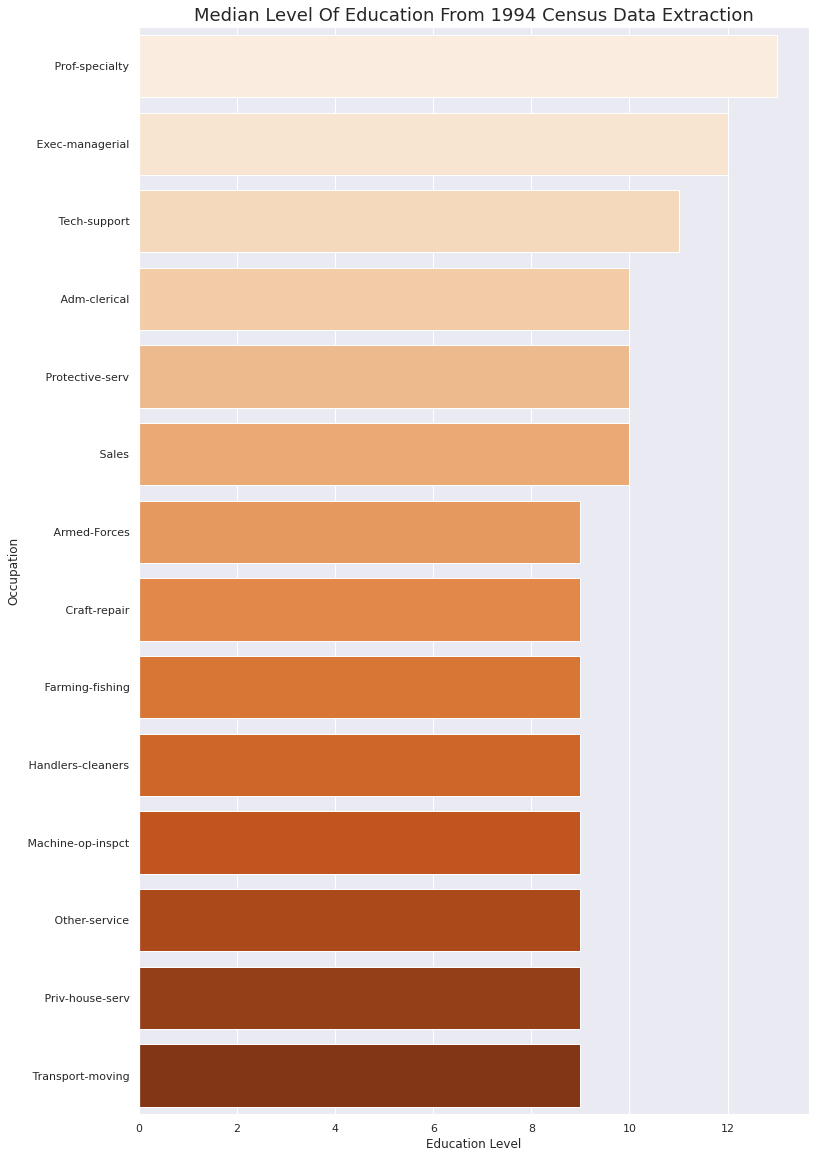

In [ ]:
sns.set()

df_education = copy_df.sort_values(by='education-num', ascending=False)
y_vals = df_education['education-num']

x_vals = df_education.index.to_series()

plt.tight_layout()
plt.figure(figsize=(12, 20))
sns.barplot(x=y_vals, y=x_vals, palette='Oranges')

plt.xlabel('Education Level')
plt.ylabel('Occupation')

title = 'Median Level Of Education From 1994 Census Data Extraction'
plt.title(title, size=18)
plt.savefig(title, dpi=250, bbox_inches='tight', 
            pad_inches=0.6)
plt.show()

Occupations of professional speciality have the highest median education.

#Converting Text Into Numeric Data

In order for our data to be prepared for machine learning, we must have all numeric columns.

In [ ]:
del df['education']
del df['native-country']
df = pd.get_dummies(df)
del df['annual-income_ <=50K']
del df['sex_ Female']
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,annual-income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


Here, unnecessary columns have been deleted, and text columns have been converted to numeric columns using one-hot encoding(pd.get_dummies()).

In [ ]:
df.shape

(30162, 47)

Our adjusted data frame has 30162 rows, 47 columns, good for machine learning.

#Save DataFrame

In [ ]:
df.to_csv('census_cleaned.csv')

#Split Data into X and y for Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Build Model

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_iter=5000)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8628829067762896

The score is approximately 0.79, which is fairly accurate(0 being least accurate, 1 being most accurate)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(), X, y)

array([0.85662191, 0.85479861, 0.86240053, 0.86422414, 0.86190318])

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[6],
        'learning_rate':[0.1,0.2],
        }
model= GridSearchCV(XGBClassifier(), params,cv=10)
model.fit(X, y)
best_params = model.best_params_
scores = model.best_score_
print(best_params)
print(scores)

{'learning_rate': 0.1, 'max_depth': 6}
0.8698696005570555


We have an accuracy of 86.9%